In [1]:
%load_ext processingpymat

In [2]:
%matplotlib nbagg

In [3]:
import sys
sys.path.append('Tankgame')

In [37]:
from tankai import TankAI, Operation
from ai import AI

class RandomAI(TankAI):
    def __init__(self, name='Unknown'):
        super().__init__()
        self.ai = None
        self.ops = None
        self.name = name
    
    def perform(self, env):
        if self.ai is None:
            self.ai = [AI(10) for h in env.heroes]
            self.ops = [Operation() for h in env.heroes]
        print((self.name, [(h.x, h.y, h.body_rot, h.gun_rot) for h in env.heroes]))
        for ai, op in zip(self.ai, self.ops):
            ai.move(op)
        return self.ops

In [38]:
hero_ai = RandomAI('Legion A')
enemy_ai = RandomAI('Legion B')

<IPython.core.display.Javascript object>


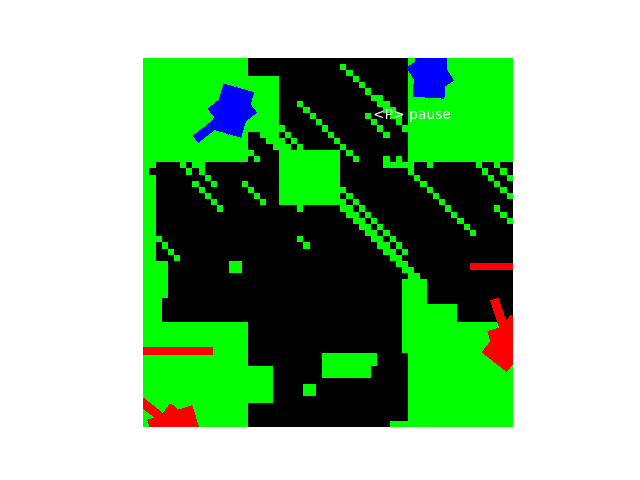

/srv/conda/envs/notebook/lib/python3.7/site-packages/processingpymat/processing.py:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
/srv/conda/envs/notebook/lib/python3.7/site-packages/processingpymat/processing.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


(<processingpymat.processing.Processing at 0x7f8234539b90>,
 <matplotlib.animation.FuncAnimation at 0x7f82344dd6d0>)

In [39]:
%%processing skipframes=9
from env import Environment
from world import World
from tank import Tank
from target import Target
from ai import AI
from ui import UI

bullets = []

def setup():
    global grid, target, world, heroes, enemies, ui

    size(240, 240, P2D)
    noSmooth()

    ui = UI()

    world = World(width, height, 4)
    world.create_grid()

    tank = Tank(30, 30, bullets, ui, True)
    world.destroy(70, tank.x, tank.y)
    tank1 = tank
    tank = Tank(240 - 30, 30, bullets, ui, True)
    world.destroy(70, tank.x, tank.y)
    tank2 = tank
    heroes = [tank1, tank2]

    enemy = Tank(30, 240 - 30, bullets, ui, False)
    world.destroy(70,  enemy.x, enemy.y)
    enemy1 = enemy
    enemy = Tank(240 - 30, 240 - 30, bullets, ui, False)
    world.destroy(70,  enemy.x, enemy.y)
    enemy2 = enemy

    #enemy2 = Tank(300, 400, bullets, ui, False)
    #world.destroy(100, 300, 400)

    #enemies = [enemy, enemy2]
    enemies = [enemy1, enemy2]

    noStroke()
    
    # Start game automatically
    ui.state = ui.gameplay


def draw():
    global bullets, world, heroes, enemies, ui

    #background(200, 255, 100)
    background(0, 255, 0)

    world.render()
    
    hero_ops = hero_ai.perform(Environment(world, heroes, enemies, bullets))
    for tank, op in zip(heroes, hero_ops):
        op.applyTo(tank)
    enemy_ops = enemy_ai.perform(Environment(world, enemies, heroes, bullets))
    for tank, op in zip(enemies, enemy_ops):
        op.applyTo(tank)

    for tank in heroes:
        if ui.state == ui.gameplay:
            tank.update(world)
        tank.render(False)

    for enemy in enemies:
        if ui.state == ui.gameplay:
            enemy.update(world)
        enemy.render(False)

    destroyed = []
    for i, bullet in enumerate(bullets):

        destroy = False

        if bullet.x < 0 or bullet.x > width or bullet.y < 0 or bullet.y > height:
            destroy = True
        else:

            for tank in heroes:
                if bullet.x > tank.x-tank._height/2 and bullet.x < tank.x+tank._height/2 and bullet.y > tank.y-tank._height/2 and bullet.y < tank.y+tank._height/2:
                    tank.hit()
                    destroy = True
                    continue

            for enemy in enemies:

                if bullet.x > enemy.x-enemy._height/2 and bullet.x < enemy.x+enemy._height/2 and bullet.y > enemy.y-enemy._height/2 and bullet.y < enemy.y+enemy._height/2:
                    enemy.hit()
                    destroy = True
                    continue

            if world.grid[min(int(bullet.y / world.cell_size), len(world.grid) - 1)][min(int(bullet.x / world.cell_size), len(world.grid[0]) - 1)] == 1:

                world.destroy(int(random(20, 40)), int(bullet.x), int(bullet.y))
                destroy = True

        if destroy:
            destroyed.append(i)
            continue

        if ui.state == ui.gameplay:
            bullet.update()
        bullet.render()
        
    for d in destroyed[::-1]:
        bullets.pop(d)

    ui.render()

<IPython.core.display.Javascript object>


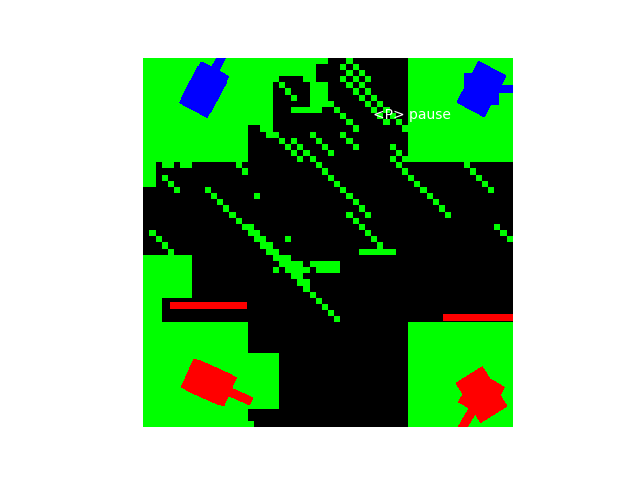

('Legion A', [(30, 30, 0, 0), (210, 30, 0, 0)])
('Legion B', [(30, 210, 0, 0), (210, 210, 0, 0)])
('Legion A', [(21.005482556828138, 30.31409547032251, -2, -2), (200.99939082701908, 29.9651005032975, -2, 0)])
('Legion B', [(21.0, 210.0, 0, 0), (201.02375032442083, 209.33733475926127, 2, 4)])
('Legion A', [(22.003046607087963, 30.244338996578385, -4, -4), (201.9969548772789, 29.895344029553375, -4, 0)])
('Legion B', [(22.0, 210.0, 0, 0), (202.02131437468066, 209.4070912330054, 4, 8)])
('Legion A', [(22.997568502456236, 30.139810533310733, -6, -6), (202.9914767726472, 29.790815566285723, -6, 0)])
('Legion B', [(23.0, 210.0, 0, 0), (203.01583627004894, 209.51161969627304, 6, 12)])
('Legion A', [(23.987836571197807, 30.00063743235067, -8, -8), (203.98174484138875, 29.651642465325658, -8, 0)])
('Legion B', [(24.0, 210.0, 0, 0), (204.0061043387905, 209.65079279723312, 8, 16)])
('Legion A', [(24.972644324210016, 29.82698925468374, -10, -10), (204.96655259440095, 29.477994287658728, -10, 0)])


In [40]:
proc = %lastprocess
proc.generate(frames=30)